In [ ]:
# Test 5-1 Dataset E
# Test to see if circle is present in the image

In [1]:
import numpy as np
import optuna as opt
from optuna.visualization import plot_optimization_history
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-04-02 20:54:33.189907: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 20:54:33.189980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 20:54:33.191480: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-02 20:54:33.199654: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 20:54:34.234163: W tensorflow/compiler/tf2

[]

In [2]:
train_dir = '../../Generator/Datasets/Dataset_E/train'
test_dir = '../../Generator/Datasets/Dataset_E/test'

In [3]:
IMG_SIZE = 250
BATCH_SIZE = 32

In [4]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


TypeError: Invalid shape (32, 250, 250, 3) for image data

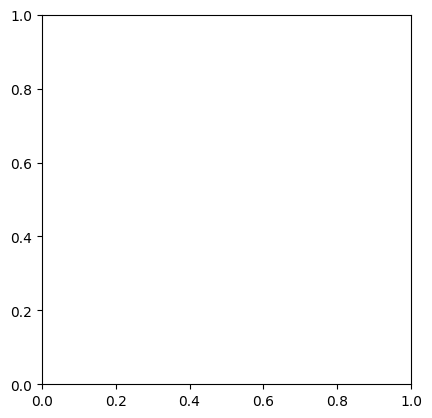

In [49]:
batch_test = next(iter(test_dataset))
plt.imshow(batch_test[0].numpy().astype("uint8"))

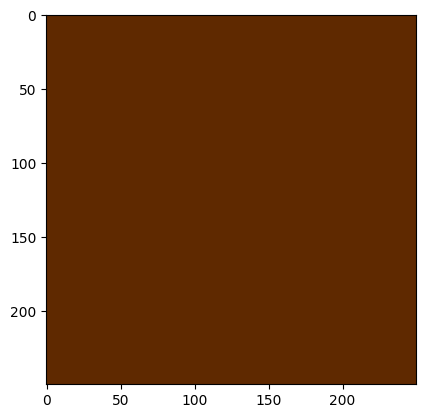

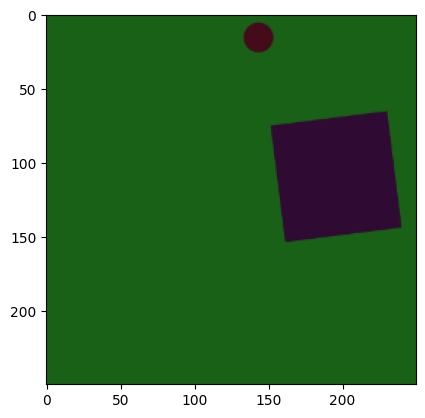

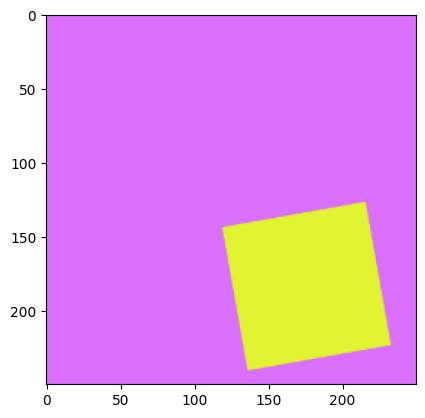

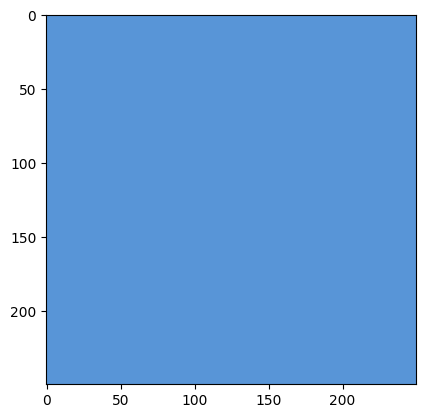

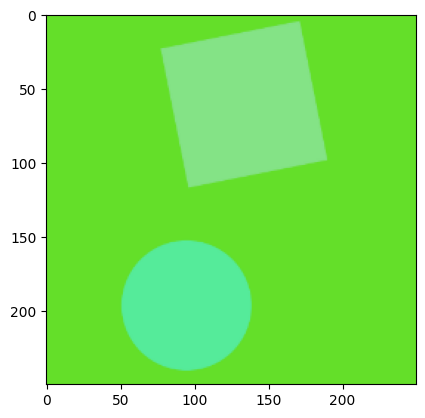

In [37]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [6]:
checkpoint_filepath = 'models/5-1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

In [7]:
def objective(trial):
    opt_num_hidden_dense_units = trial.suggest_int("opt_num_hidden_dense_units", 10, 512)
    opt_lr = trial.suggest_float("opt_lr", 1e-6, 1e-2, log=True)
    opt_bs = trial.suggest_int("opt_bs", 16, 128)
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = layers.Rescaling(1./255)(inputs)
    x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(opt_num_hidden_dense_units, activation="relu")(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=opt_lr), metrics=['acc'])
    history = model.fit(train_dataset, epochs=10, batch_size=opt_bs, validation_data=test_dataset, callbacks=[callbacks])
    min_val_loss = np.amin(history.history["val_loss"])
    return min_val_loss

In [8]:
study = opt.create_study()
study.optimize(objective, n_trials=15)

[I 2024-04-02 12:05:26,228] A new study created in memory with name: no-name-90bd35d5-283b-421b-bc7f-080d0d5b1f8e


Epoch 1/10


2024-04-02 12:05:27.956918: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-02 12:05:28.204462: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-02 12:05:30.332765: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6d941f7fb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-02 12:05:30.332810: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 with Max-Q Design, Compute Capability 6.1
2024-04-02 12:05:30.346901: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1712055930.450991   21515 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


94/94 [==============================] - ETA: 0s - loss: 0.6981 - acc: 0.5007
Epoch 1: val_loss improved from inf to 0.68879, saving model to models/5-1/ch-001.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-001.ckpt/assets


94/94 [==============================] - 13s 77ms/step - loss: 0.6981 - acc: 0.5007 - val_loss: 0.6888 - val_acc: 0.5290
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6946 - acc: 0.5183
Epoch 2: val_loss did not improve from 0.68879
94/94 [==============================] - 5s 52ms/step - loss: 0.6946 - acc: 0.5183 - val_loss: 0.6890 - val_acc: 0.5330
Epoch 3/10
94/94 [==============================] - ETA: 0s - loss: 0.6861 - acc: 0.5467
Epoch 3: val_loss improved from 0.68879 to 0.68790, saving model to models/5-1/ch-003.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-003.ckpt/assets


94/94 [==============================] - 6s 57ms/step - loss: 0.6861 - acc: 0.5467 - val_loss: 0.6879 - val_acc: 0.5380
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.6778 - acc: 0.5786
Epoch 4: val_loss improved from 0.68790 to 0.67434, saving model to models/5-1/ch-004.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-004.ckpt/assets


94/94 [==============================] - 5s 56ms/step - loss: 0.6784 - acc: 0.5770 - val_loss: 0.6743 - val_acc: 0.6050
Epoch 5/10
93/94 [============================>.] - ETA: 0s - loss: 0.6716 - acc: 0.6022
Epoch 5: val_loss improved from 0.67434 to 0.66757, saving model to models/5-1/ch-005.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-005.ckpt/assets


94/94 [==============================] - 6s 64ms/step - loss: 0.6721 - acc: 0.6007 - val_loss: 0.6676 - val_acc: 0.6170
Epoch 6/10
94/94 [==============================] - ETA: 0s - loss: 0.6606 - acc: 0.6120
Epoch 6: val_loss did not improve from 0.66757
94/94 [==============================] - 5s 46ms/step - loss: 0.6606 - acc: 0.6120 - val_loss: 0.6747 - val_acc: 0.5790
Epoch 7/10
94/94 [==============================] - ETA: 0s - loss: 0.6502 - acc: 0.6353
Epoch 7: val_loss did not improve from 0.66757
94/94 [==============================] - 4s 45ms/step - loss: 0.6502 - acc: 0.6353 - val_loss: 0.6692 - val_acc: 0.5880
Epoch 8/10
93/94 [============================>.] - ETA: 0s - loss: 0.6394 - acc: 0.6499
Epoch 8: val_loss improved from 0.66757 to 0.64863, saving model to models/5-1/ch-008.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-008.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-008.ckpt/assets


94/94 [==============================] - 6s 59ms/step - loss: 0.6392 - acc: 0.6497 - val_loss: 0.6486 - val_acc: 0.6230
Epoch 9/10
94/94 [==============================] - ETA: 0s - loss: 0.6284 - acc: 0.6583
Epoch 9: val_loss improved from 0.64863 to 0.64085, saving model to models/5-1/ch-009.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-009.ckpt/assets


94/94 [==============================] - 6s 58ms/step - loss: 0.6284 - acc: 0.6583 - val_loss: 0.6408 - val_acc: 0.6660
Epoch 10/10
93/94 [============================>.] - ETA: 0s - loss: 0.6275 - acc: 0.6573
Epoch 10: val_loss improved from 0.64085 to 0.63658, saving model to models/5-1/ch-010.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-010.ckpt/assets


94/94 [==============================] - 6s 59ms/step - loss: 0.6269 - acc: 0.6580 - val_loss: 0.6366 - val_acc: 0.6290


[I 2024-04-02 12:06:28,596] Trial 0 finished with value: 0.6365829110145569 and parameters: {'opt_num_hidden_dense_units': 123, 'opt_lr': 2.069091513872115e-05, 'opt_bs': 50}. Best is trial 0 with value: 0.6365829110145569.


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.7665 - acc: 0.5273
Epoch 1: val_loss did not improve from 0.63658
94/94 [==============================] - 7s 53ms/step - loss: 0.7665 - acc: 0.5273 - val_loss: 0.6898 - val_acc: 0.5490
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6821 - acc: 0.5687
Epoch 2: val_loss did not improve from 0.63658
94/94 [==============================] - 5s 51ms/step - loss: 0.6821 - acc: 0.5687 - val_loss: 0.6610 - val_acc: 0.6720
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6391 - acc: 0.6764
Epoch 3: val_loss did not improve from 0.63658
94/94 [==============================] - 5s 49ms/step - loss: 0.6395 - acc: 0.6753 - val_loss: 0.6562 - val_acc: 0.6290
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.6002 - acc: 0.6825
Epoch 4: val_loss improved from 0.63658 to 0.61690, saving model to models/5-1/ch-004.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-004

INFO:tensorflow:Assets written to: models/5-1/ch-004.ckpt/assets


94/94 [==============================] - 6s 66ms/step - loss: 0.6004 - acc: 0.6830 - val_loss: 0.6169 - val_acc: 0.6580
Epoch 5/10
93/94 [============================>.] - ETA: 0s - loss: 0.5401 - acc: 0.7369
Epoch 5: val_loss improved from 0.61690 to 0.54754, saving model to models/5-1/ch-005.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-005.ckpt/assets


94/94 [==============================] - 10s 105ms/step - loss: 0.5397 - acc: 0.7370 - val_loss: 0.5475 - val_acc: 0.7220
Epoch 6/10
93/94 [============================>.] - ETA: 0s - loss: 0.5063 - acc: 0.7497
Epoch 6: val_loss did not improve from 0.54754
94/94 [==============================] - 8s 78ms/step - loss: 0.5050 - acc: 0.7513 - val_loss: 0.5609 - val_acc: 0.7060
Epoch 7/10
94/94 [==============================] - ETA: 0s - loss: 0.4793 - acc: 0.7700
Epoch 7: val_loss did not improve from 0.54754
94/94 [==============================] - 5s 56ms/step - loss: 0.4793 - acc: 0.7700 - val_loss: 0.5602 - val_acc: 0.7250
Epoch 8/10
94/94 [==============================] - ETA: 0s - loss: 0.4229 - acc: 0.7953
Epoch 8: val_loss did not improve from 0.54754
94/94 [==============================] - 5s 52ms/step - loss: 0.4229 - acc: 0.7953 - val_loss: 0.5781 - val_acc: 0.7290
Epoch 9/10
93/94 [============================>.] - ETA: 0s - loss: 0.3588 - acc: 0.8310
Epoch 9: val_loss did

[I 2024-04-02 12:07:31,524] Trial 1 finished with value: 0.5475444197654724 and parameters: {'opt_num_hidden_dense_units': 440, 'opt_lr': 0.001949568098565191, 'opt_bs': 64}. Best is trial 1 with value: 0.5475444197654724.


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.6927 - acc: 0.4990
Epoch 1: val_loss did not improve from 0.54754
94/94 [==============================] - 7s 52ms/step - loss: 0.6927 - acc: 0.4990 - val_loss: 0.6901 - val_acc: 0.5980
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.6902 - acc: 0.5138
Epoch 2: val_loss did not improve from 0.54754
94/94 [==============================] - 5s 46ms/step - loss: 0.6902 - acc: 0.5143 - val_loss: 0.6878 - val_acc: 0.5430
Epoch 3/10
94/94 [==============================] - ETA: 0s - loss: 0.6877 - acc: 0.5280
Epoch 3: val_loss did not improve from 0.54754
94/94 [==============================] - 5s 51ms/step - loss: 0.6877 - acc: 0.5280 - val_loss: 0.6851 - val_acc: 0.5610
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.6845 - acc: 0.5501
Epoch 4: val_loss did not improve from 0.54754
94/94 [==============================] - 5s 47ms/step - loss: 0.6845 - acc: 0.5503 - val_loss: 0

[I 2024-04-02 12:08:22,814] Trial 2 finished with value: 0.6594014167785645 and parameters: {'opt_num_hidden_dense_units': 331, 'opt_lr': 6.110194222698653e-06, 'opt_bs': 108}. Best is trial 1 with value: 0.5475444197654724.


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.6646 - acc: 0.6087
Epoch 1: val_loss did not improve from 0.54754
94/94 [==============================] - 6s 46ms/step - loss: 0.6646 - acc: 0.6087 - val_loss: 0.5918 - val_acc: 0.6780
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.5302 - acc: 0.7307
Epoch 2: val_loss improved from 0.54754 to 0.52219, saving model to models/5-1/ch-002.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-002.ckpt/assets


94/94 [==============================] - 6s 65ms/step - loss: 0.5302 - acc: 0.7307 - val_loss: 0.5222 - val_acc: 0.7360
Epoch 3/10
94/94 [==============================] - ETA: 0s - loss: 0.4889 - acc: 0.7460
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 53ms/step - loss: 0.4889 - acc: 0.7460 - val_loss: 0.5498 - val_acc: 0.7280
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.4815 - acc: 0.7537
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 49ms/step - loss: 0.4813 - acc: 0.7540 - val_loss: 0.5541 - val_acc: 0.7260
Epoch 5/10
94/94 [==============================] - ETA: 0s - loss: 0.4415 - acc: 0.7753
Epoch 5: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 48ms/step - loss: 0.4415 - acc: 0.7753 - val_loss: 0.5708 - val_acc: 0.7030
Epoch 6/10
94/94 [==============================] - ETA: 0s - loss: 0.4107 - acc: 0.7933
Epoch 6: val_loss did n

[I 2024-04-02 12:09:14,376] Trial 3 finished with value: 0.5221923589706421 and parameters: {'opt_num_hidden_dense_units': 60, 'opt_lr': 0.0013693618689800777, 'opt_bs': 119}. Best is trial 3 with value: 0.5221923589706421.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.7100 - acc: 0.5218
Epoch 1: val_loss did not improve from 0.52219
94/94 [==============================] - 7s 50ms/step - loss: 0.7099 - acc: 0.5220 - val_loss: 0.6899 - val_acc: 0.5520
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6849 - acc: 0.5633
Epoch 2: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 50ms/step - loss: 0.6849 - acc: 0.5633 - val_loss: 0.6788 - val_acc: 0.5990
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6634 - acc: 0.6146
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 49ms/step - loss: 0.6623 - acc: 0.6163 - val_loss: 0.6773 - val_acc: 0.6350
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.6323 - acc: 0.6573
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 51ms/step - loss: 0.6323 - acc: 0.6573 - val_loss: 0

[I 2024-04-02 12:10:05,954] Trial 4 finished with value: 0.585204541683197 and parameters: {'opt_num_hidden_dense_units': 227, 'opt_lr': 0.0005970916708683698, 'opt_bs': 53}. Best is trial 3 with value: 0.5221923589706421.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.6960 - acc: 0.5255
Epoch 1: val_loss did not improve from 0.52219
94/94 [==============================] - 7s 53ms/step - loss: 0.6956 - acc: 0.5267 - val_loss: 0.6799 - val_acc: 0.5660
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6721 - acc: 0.5840
Epoch 2: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 52ms/step - loss: 0.6721 - acc: 0.5840 - val_loss: 0.6591 - val_acc: 0.6180
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6470 - acc: 0.6465
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 6s 61ms/step - loss: 0.6472 - acc: 0.6463 - val_loss: 0.6891 - val_acc: 0.5590
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.6275 - acc: 0.6647
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 50ms/step - loss: 0.6275 - acc: 0.6647 - val_loss: 0

[I 2024-04-02 12:11:05,107] Trial 5 finished with value: 0.5924705862998962 and parameters: {'opt_num_hidden_dense_units': 512, 'opt_lr': 4.343372030639474e-05, 'opt_bs': 55}. Best is trial 3 with value: 0.5221923589706421.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.6864 - acc: 0.5548
Epoch 1: val_loss did not improve from 0.52219
94/94 [==============================] - 7s 49ms/step - loss: 0.6861 - acc: 0.5553 - val_loss: 0.6831 - val_acc: 0.5790
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6381 - acc: 0.6517
Epoch 2: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 52ms/step - loss: 0.6381 - acc: 0.6517 - val_loss: 0.6122 - val_acc: 0.6800
Epoch 3/10
94/94 [==============================] - ETA: 0s - loss: 0.5822 - acc: 0.7080
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 6s 53ms/step - loss: 0.5822 - acc: 0.7080 - val_loss: 0.6052 - val_acc: 0.6560
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.5375 - acc: 0.7310
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 46ms/step - loss: 0.5375 - acc: 0.7310 - val_loss: 0

[I 2024-04-02 12:11:54,198] Trial 6 finished with value: 0.547225832939148 and parameters: {'opt_num_hidden_dense_units': 32, 'opt_lr': 0.000385071334440661, 'opt_bs': 98}. Best is trial 3 with value: 0.5221923589706421.


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.6955 - acc: 0.5007
Epoch 1: val_loss did not improve from 0.52219
94/94 [==============================] - 7s 54ms/step - loss: 0.6955 - acc: 0.5007 - val_loss: 0.6952 - val_acc: 0.5090
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.5137
Epoch 2: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 48ms/step - loss: 0.6931 - acc: 0.5137 - val_loss: 0.6940 - val_acc: 0.5230
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6895 - acc: 0.5373
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 50ms/step - loss: 0.6896 - acc: 0.5363 - val_loss: 0.6980 - val_acc: 0.5110
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.6885 - acc: 0.5430
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 46ms/step - loss: 0.6885 - acc: 0.5430 - val_loss: 0

[I 2024-04-02 12:12:44,223] Trial 7 finished with value: 0.6862455010414124 and parameters: {'opt_num_hidden_dense_units': 75, 'opt_lr': 8.934095436911755e-06, 'opt_bs': 56}. Best is trial 3 with value: 0.5221923589706421.


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.6951 - acc: 0.4900
Epoch 1: val_loss did not improve from 0.52219
94/94 [==============================] - 7s 55ms/step - loss: 0.6951 - acc: 0.4900 - val_loss: 0.6936 - val_acc: 0.5060
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.6938 - acc: 0.5013
Epoch 2: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 49ms/step - loss: 0.6939 - acc: 0.5017 - val_loss: 0.6933 - val_acc: 0.4940
Epoch 3/10
94/94 [==============================] - ETA: 0s - loss: 0.6928 - acc: 0.5073
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 53ms/step - loss: 0.6928 - acc: 0.5073 - val_loss: 0.6922 - val_acc: 0.4960
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.6925 - acc: 0.5107
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 51ms/step - loss: 0.6925 - acc: 0.5107 - val_loss: 0

[I 2024-04-02 12:13:35,911] Trial 8 finished with value: 0.6860760450363159 and parameters: {'opt_num_hidden_dense_units': 401, 'opt_lr': 1.8026880416439437e-06, 'opt_bs': 111}. Best is trial 3 with value: 0.5221923589706421.


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.7001 - acc: 0.5030
Epoch 1: val_loss did not improve from 0.52219
94/94 [==============================] - 7s 50ms/step - loss: 0.7001 - acc: 0.5030 - val_loss: 0.6905 - val_acc: 0.5240
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.6899 - acc: 0.5353
Epoch 2: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 49ms/step - loss: 0.6898 - acc: 0.5357 - val_loss: 0.6857 - val_acc: 0.5560
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6786 - acc: 0.5753
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 4s 42ms/step - loss: 0.6785 - acc: 0.5770 - val_loss: 0.6926 - val_acc: 0.5360
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.6660 - acc: 0.5983
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 4s 43ms/step - loss: 0.6660 - acc: 0.5983 - val_loss: 0

[I 2024-04-02 12:14:25,642] Trial 9 finished with value: 0.6077643632888794 and parameters: {'opt_num_hidden_dense_units': 137, 'opt_lr': 5.79901943039493e-05, 'opt_bs': 18}. Best is trial 3 with value: 0.5221923589706421.


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 1.1137 - acc: 0.4960
Epoch 1: val_loss did not improve from 0.52219
94/94 [==============================] - 7s 51ms/step - loss: 1.1137 - acc: 0.4960 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6933 - acc: 0.4920
Epoch 2: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 47ms/step - loss: 0.6933 - acc: 0.4920 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6933 - acc: 0.4960
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 6s 66ms/step - loss: 0.6933 - acc: 0.4953 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.6934 - acc: 0.4852
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 51ms/step - loss: 0.6934 - acc: 0.4847 - val_loss: 0

[I 2024-04-02 12:15:17,480] Trial 10 finished with value: 0.6931471824645996 and parameters: {'opt_num_hidden_dense_units': 227, 'opt_lr': 0.0075294452086383384, 'opt_bs': 128}. Best is trial 3 with value: 0.5221923589706421.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.6953 - acc: 0.5131
Epoch 1: val_loss did not improve from 0.52219
94/94 [==============================] - 6s 46ms/step - loss: 0.6953 - acc: 0.5140 - val_loss: 0.6901 - val_acc: 0.5430
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6764 - acc: 0.5877
Epoch 2: val_loss did not improve from 0.52219
94/94 [==============================] - 6s 60ms/step - loss: 0.6764 - acc: 0.5877 - val_loss: 0.6669 - val_acc: 0.6060
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6521 - acc: 0.6253
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 4s 44ms/step - loss: 0.6519 - acc: 0.6260 - val_loss: 0.6458 - val_acc: 0.6310
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.6241 - acc: 0.6637
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 4s 44ms/step - loss: 0.6241 - acc: 0.6637 - val_loss: 0

[I 2024-04-02 12:16:06,333] Trial 11 finished with value: 0.5939120650291443 and parameters: {'opt_num_hidden_dense_units': 25, 'opt_lr': 0.000333943837435, 'opt_bs': 93}. Best is trial 3 with value: 0.5221923589706421.


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.6933 - acc: 0.5173
Epoch 1: val_loss did not improve from 0.52219
94/94 [==============================] - 6s 44ms/step - loss: 0.6933 - acc: 0.5173 - val_loss: 0.6914 - val_acc: 0.5140
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.6887 - acc: 0.5376
Epoch 2: val_loss did not improve from 0.52219
94/94 [==============================] - 4s 45ms/step - loss: 0.6887 - acc: 0.5373 - val_loss: 0.6871 - val_acc: 0.5400
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6836 - acc: 0.5551
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 4s 42ms/step - loss: 0.6837 - acc: 0.5563 - val_loss: 0.6817 - val_acc: 0.5550
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.6775 - acc: 0.5527
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 4s 43ms/step - loss: 0.6775 - acc: 0.5527 - val_loss: 0

[I 2024-04-02 12:16:51,364] Trial 12 finished with value: 0.6618139743804932 and parameters: {'opt_num_hidden_dense_units': 27, 'opt_lr': 0.00027280836015996737, 'opt_bs': 87}. Best is trial 3 with value: 0.5221923589706421.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.6567 - acc: 0.6250
Epoch 1: val_loss did not improve from 0.52219
94/94 [==============================] - 7s 56ms/step - loss: 0.6562 - acc: 0.6253 - val_loss: 0.6383 - val_acc: 0.6450
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.5446 - acc: 0.7228
Epoch 2: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 51ms/step - loss: 0.5447 - acc: 0.7227 - val_loss: 0.5535 - val_acc: 0.7080
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.5095 - acc: 0.7386
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 47ms/step - loss: 0.5090 - acc: 0.7383 - val_loss: 0.5484 - val_acc: 0.6960
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.4879 - acc: 0.7520
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 4s 44ms/step - loss: 0.4879 - acc: 0.7520 - val_loss: 0

[I 2024-04-02 12:17:45,516] Trial 13 finished with value: 0.5483694076538086 and parameters: {'opt_num_hidden_dense_units': 159, 'opt_lr': 0.0019954483139965045, 'opt_bs': 127}. Best is trial 3 with value: 0.5221923589706421.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.7518 - acc: 0.5027
Epoch 1: val_loss did not improve from 0.52219
94/94 [==============================] - 6s 44ms/step - loss: 0.7513 - acc: 0.5040 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.6933 - acc: 0.4946
Epoch 2: val_loss did not improve from 0.52219
94/94 [==============================] - 4s 43ms/step - loss: 0.6933 - acc: 0.4940 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/10
94/94 [==============================] - ETA: 0s - loss: 0.6935 - acc: 0.4933
Epoch 3: val_loss did not improve from 0.52219
94/94 [==============================] - 4s 43ms/step - loss: 0.6935 - acc: 0.4933 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.6934 - acc: 0.4946
Epoch 4: val_loss did not improve from 0.52219
94/94 [==============================] - 5s 45ms/step - loss: 0.6934 - acc: 0.4940 - val_loss: 0

[I 2024-04-02 12:18:29,425] Trial 14 finished with value: 0.6931472420692444 and parameters: {'opt_num_hidden_dense_units': 15, 'opt_lr': 0.009062349926649603, 'opt_bs': 85}. Best is trial 3 with value: 0.5221923589706421.


In [9]:
plot_optimization_history(study)

In [10]:
from optuna.visualization import plot_contour
plot_contour(study, params=["opt_lr", "opt_bs"])

In [11]:
from optuna.visualization import plot_param_importances
plot_param_importances(study)

In [21]:
best_params = study.best_params
found_opt_num_hidden_dense_units = best_params["opt_num_hidden_dense_units"]
found_opt_lr = best_params["opt_lr"]
found_opt_bs = best_params["opt_bs"]
print("Found num hidden dense units: {}".format(found_opt_num_hidden_dense_units))
print("Found learning rate: {}".format(found_opt_lr))
print("Found batch size: {}".format(found_opt_bs))

Found num hidden dense units: 60
Found learning rate: 0.0013693618689800777
Found batch size: 119


In [22]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(found_opt_num_hidden_dense_units, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [23]:
model.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(learning_rate=found_opt_lr), 
    metrics=['acc'])

In [25]:
checkpoint_filepath = 'models/5-1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

In [26]:
#Best Epoch = ?

history = model.fit(train_dataset, epochs=80, batch_size=found_opt_bs, validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/80
94/94 [==============================] - ETA: 0s - loss: 0.7439 - acc: 0.5330
Epoch 1: val_loss improved from inf to 0.68566, saving model to models/5-1/ch-001.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-001.ckpt/assets


94/94 [==============================] - 7s 58ms/step - loss: 0.7439 - acc: 0.5330 - val_loss: 0.6857 - val_acc: 0.6540
Epoch 2/80
93/94 [============================>.] - ETA: 0s - loss: 0.6691 - acc: 0.6442
Epoch 2: val_loss did not improve from 0.68566
94/94 [==============================] - 5s 46ms/step - loss: 0.6678 - acc: 0.6457 - val_loss: 0.7584 - val_acc: 0.6040
Epoch 3/80
94/94 [==============================] - ETA: 0s - loss: 0.6069 - acc: 0.6850
Epoch 3: val_loss improved from 0.68566 to 0.64730, saving model to models/5-1/ch-003.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-003.ckpt/assets


94/94 [==============================] - 6s 58ms/step - loss: 0.6069 - acc: 0.6850 - val_loss: 0.6473 - val_acc: 0.6350
Epoch 4/80
94/94 [==============================] - ETA: 0s - loss: 0.5297 - acc: 0.7340
Epoch 4: val_loss improved from 0.64730 to 0.59690, saving model to models/5-1/ch-004.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-004.ckpt/assets


94/94 [==============================] - 5s 54ms/step - loss: 0.5297 - acc: 0.7340 - val_loss: 0.5969 - val_acc: 0.6990
Epoch 5/80
94/94 [==============================] - ETA: 0s - loss: 0.4702 - acc: 0.7630
Epoch 5: val_loss improved from 0.59690 to 0.57705, saving model to models/5-1/ch-005.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-005.ckpt/assets


94/94 [==============================] - 5s 55ms/step - loss: 0.4702 - acc: 0.7630 - val_loss: 0.5770 - val_acc: 0.7140
Epoch 6/80
93/94 [============================>.] - ETA: 0s - loss: 0.4365 - acc: 0.7802
Epoch 6: val_loss did not improve from 0.57705
94/94 [==============================] - 5s 51ms/step - loss: 0.4357 - acc: 0.7807 - val_loss: 0.5969 - val_acc: 0.7240
Epoch 7/80
94/94 [==============================] - ETA: 0s - loss: 0.3973 - acc: 0.7990
Epoch 7: val_loss did not improve from 0.57705
94/94 [==============================] - 5s 47ms/step - loss: 0.3973 - acc: 0.7990 - val_loss: 0.5930 - val_acc: 0.7160
Epoch 8/80
94/94 [==============================] - ETA: 0s - loss: 0.3505 - acc: 0.8250
Epoch 8: val_loss did not improve from 0.57705
94/94 [==============================] - 5s 51ms/step - loss: 0.3505 - acc: 0.8250 - val_loss: 0.6666 - val_acc: 0.7110
Epoch 9/80
94/94 [==============================] - ETA: 0s - loss: 0.3084 - acc: 0.8537
Epoch 9: val_loss did n

In [ ]:
history_2 = model.fit(train_dataset, epochs=10, batch_size=found_opt_bs, validation_data=test_dataset)

In [ ]:
history_3 = model.fit(train_dataset, epochs=20, batch_size=found_opt_bs, validation_data=test_dataset)

In [ ]:
history_4 = model.fit(train_dataset, epochs=30, batch_size=found_opt_bs, validation_data=test_dataset)

In [5]:
model = keras.models.load_model('models/5-1/5-1-E.keras')

In [5]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=32)
print(val_loss, val_acc)

NameError: name 'test_dataset' is not defined

In [ ]:
combined_history = {}
for fit_history in [history, history_2, history_3, history_4]: 
    epochs = range(1, len(fit_history.history['acc']) + 1) 

    for metric in ['acc', 'val_acc', 'loss', 'val_loss']:
        if metric not in combined_history:
            combined_history[metric] = []
        combined_history[metric].extend(fit_history.history[metric])

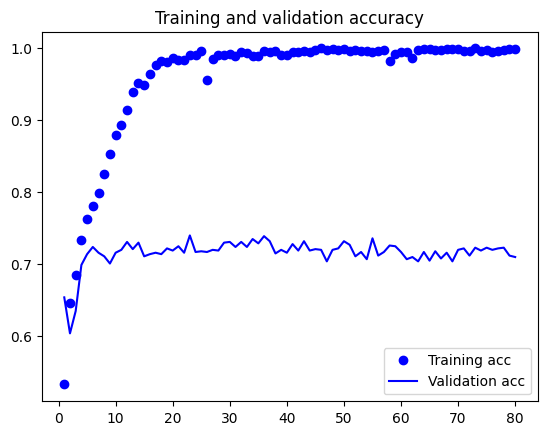

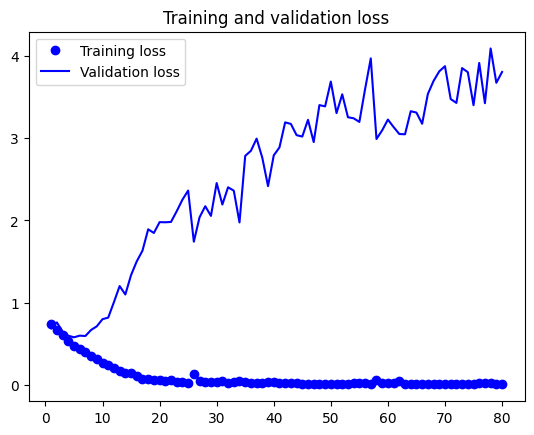

In [32]:
# acc = combined_history['acc']
# val_acc = combined_history['val_acc']
# loss = combined_history['loss']
# val_loss = combined_history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/5-1/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/5-1/train_test_acc",dpi=100)
plt.show()


In [33]:
model.save('models/5-1/5-1-E.keras')

In [36]:
file_paths = []
wrong_filenames = []
count = 0
file_idx = 0

# make sure we start in the beginning
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    shuffle=False
    )
    
file_paths = test_dataset.file_paths
for data_batch, labels_batch in test_dataset:

    predictions = model.predict(data_batch).flatten()
    predictions = predictions.round()
    predictions = predictions.astype(int)
    labels_batch = labels_batch.numpy()
    #pred_str = np.array2string(predictions, separator=', ')
    #label_str = np.array2string(labels_batch, separator=', ')
    for i in range(len(data_batch)):
        if labels_batch[i] != predictions[i]:
            wrong_filenames.append(file_paths[file_idx])
    file_idx += 1

# print(f"Predictions: {pred_str}")
# print(f"Labels: {label_str}")
print(file_idx)
print(count)
print(len(wrong_filenames))

Found 1000 files belonging to 2 classes.


1/1 [==============================] - 0s 22ms/step
1000
0
290


In [38]:
for filename in wrong_filenames:
    print(filename)

print(len(wrong_filenames))

../../Generator/Datasets/Dataset_E/test/circle/circle_10.png
../../Generator/Datasets/Dataset_E/test/circle/circle_105.png
../../Generator/Datasets/Dataset_E/test/circle/circle_106.png
../../Generator/Datasets/Dataset_E/test/circle/circle_108.png
../../Generator/Datasets/Dataset_E/test/circle/circle_111.png
../../Generator/Datasets/Dataset_E/test/circle/circle_112.png
../../Generator/Datasets/Dataset_E/test/circle/circle_117.png
../../Generator/Datasets/Dataset_E/test/circle/circle_123.png
../../Generator/Datasets/Dataset_E/test/circle/circle_124.png
../../Generator/Datasets/Dataset_E/test/circle/circle_125.png
../../Generator/Datasets/Dataset_E/test/circle/circle_137.png
../../Generator/Datasets/Dataset_E/test/circle/circle_139.png
../../Generator/Datasets/Dataset_E/test/circle/circle_14.png
../../Generator/Datasets/Dataset_E/test/circle/circle_142.png
../../Generator/Datasets/Dataset_E/test/circle/circle_145.png
../../Generator/Datasets/Dataset_E/test/circle/circle_15.png
../../Gener

In [39]:
# write the wrong filenames to a file
with open('results/5-1/failed_filenames.txt', 'w') as f:
    for item in wrong_filenames:
        f.write("%s\n" % item)

In [43]:
failed_images_dataset = image_dataset_from_directory(
    'results/5-1/failed_images',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

val_loss, val_acc = model.evaluate(failed_images_dataset, batch_size=32)
print(val_loss, val_acc)

Found 290 files belonging to 2 classes.


10/10 [==============================] - 1s 81ms/step - loss: 13.0781 - acc: 0.0000e+00
13.078096389770508 0.0
